# Classification on the breast_cancer dataset using Principal Component

# Librairies & Data

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline 

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
cancer = load_breast_cancer()

In [65]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [66]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [67]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [68]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

# Standardization

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
scaled_df = scaler.transform(df)

# Principal Component Analysis

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=2)

In [75]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [76]:
x_pca = pca.transform(scaled_df)

In [77]:
scaled_df.shape

(569, 30)

In [78]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

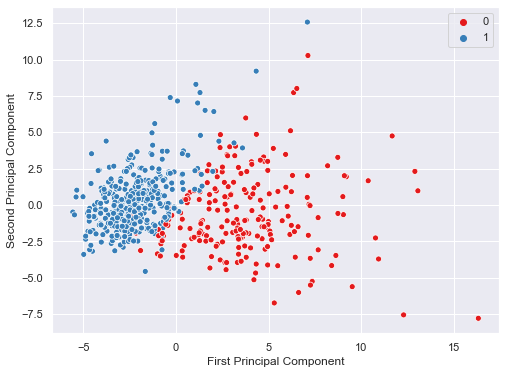

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=cancer['target'],palette='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Notes on PCA

** Components are difficult to interpret **

In [80]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


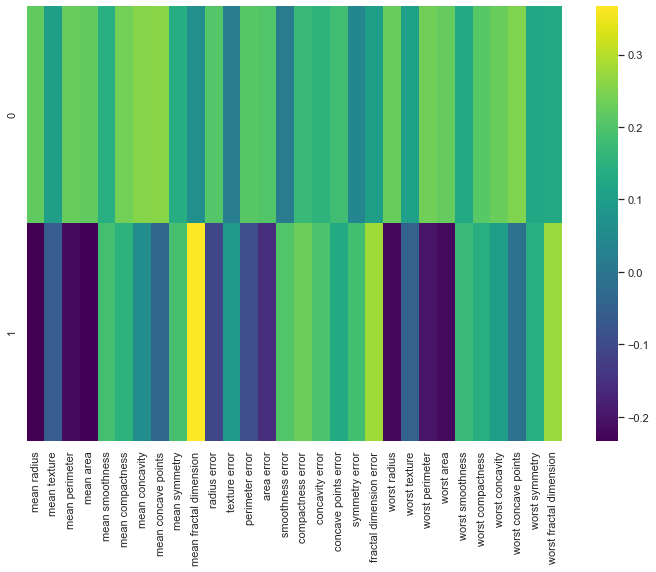

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(df_comp,cmap='viridis')

<Figure size 864x576 with 0 Axes>

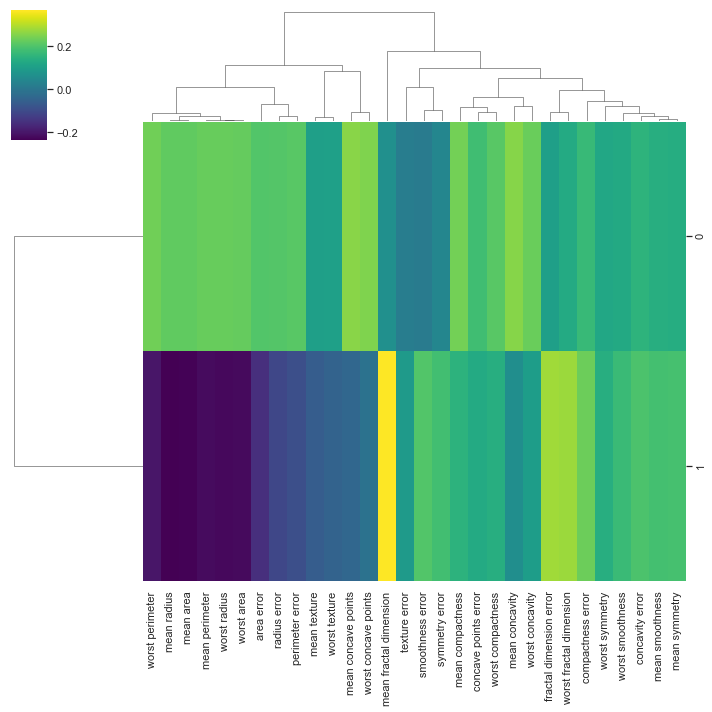

In [82]:
plt.figure(figsize=(12,8))
sns.clustermap(df_comp,cmap='viridis')

# Train Test Split

In [83]:
from sklearn.model_selection import train_test_split
x= x_pca
y= cancer['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# Support Vectors Machines

In [84]:
from sklearn.svm import SVC

In [85]:
model = SVC ()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
predictions = model.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
print (confusion_matrix(y_test,predictions))

[[ 56  10]
 [  5 100]]


In [88]:
print (classification_report(y_test,predictions))

precision    recall  f1-score   support

           0       0.92      0.85      0.88        66
           1       0.91      0.95      0.93       105

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



In [89]:
from sklearn.model_selection import GridSearchCV 

In [90]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [91]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [92]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.863, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.861, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.848, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.912, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [93]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
grid_predictions = grid.predict(x_test)
print (confusion_matrix(y_test,grid_predictions))
print (classification_report(y_test,grid_predictions))

[[61  5]
 [ 6 99]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        66
           1       0.95      0.94      0.95       105

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# Logistic Regression

In [95]:
import statsmodels.api as sm

In [96]:
reg_log = sm.Logit(y_train,x_train)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.114363
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  398
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 May 2020   Pseudo R-squ.:                  0.8260
Time:                        13:29:04   Log-Likelihood:                -45.517
converged:                       True   LL-Null:                       -261.59
Covariance Type:            nonrobust   LLR p-value:                 5.568e-96
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2664      0.321     -7.064      0.000      -2.895      -1.638
x2             1.2761      0.214      5.969      0.000       0.857       1.695
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

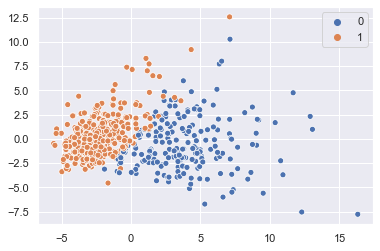

In [97]:
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=cancer['target'])

In [98]:
def logit_confusion_matrix(data,actual_values,model):
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [99]:
cm = logit_confusion_matrix(x_test,y_test,results_log)
cm

(array([[65.,  1.],
        [ 7., 98.]]),
 0.9532163742690059)

In [100]:
# Compare with the SVM Confusion Matrix

print (confusion_matrix(y_test,grid_predictions))

[[61  5]
 [ 6 99]]


In [105]:
#Without PCA

x2 = scaled_df
y2 = cancer['target']
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=101)

In [110]:
reg_log2 = sm.Logit(y,scaled_df)
results_log2 = reg_log2.fit()
results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.023921
         Iterations 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      539
Method:                           MLE   Df Model:                           29
Date:                Fri, 01 May 2020   Pseudo R-squ.:                  0.9638
Time:                        13:43:34   Log-Likelihood:                -13.611
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                8.618e-134
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           287.0824    202.609      1.417      0.157    -110.023     684.188
x2            -1.9736      3.615     -0.546      0.585      -9.058       5.111
x3          -155.1279    128.148     -1.211      0.226    -406.294      96.038
x4          -124.2255    103.669     -1.198      0.231    -327.413      78.962
x5           -17.7572     11.779     -1.507      0.132     -40.844       5.330
x6            47.5162     34.946      1.360      0.174     -20.977     116.009
x7           -13.5187     18.668     -0.724      0.469     -50.107      23.070
x8           -15.7509     16.308     -0.966      0.334     -47.715      16.213
x9             7.0581      5.286      1.335      0.182      -3.302      17.418
x10           -3.6390      7.731     -0.471      0.638     -18.791      11.513
x11           -7.5926     35.728     -0.213      0.832     -77.618      62.433
x12            4.6785      4.637      1.009      0.313      -4.411      13.768
x13           27.3367     22.987      1.189      0.234     -17.716      72.390
x14          -72.9286     72.789     -1.002      0.316    -215.592      69.735
x15           -2.0383      3.043     -0.670      0.503      -8.002       3.926
x16          -28.8732     19.253     -1.500      0.134     -66.609       8.863
x17           25.5843     17.553      1.458      0.145      -8.818      59.987
x18          -27.8933     18.893     -1.476      0.140     -64.923       9.136
x19            9.8888      7.431      1.331      0.183      -4.676      24.454
x20           47.2098     32.696      1.444      0.149     -16.874     111.293
x21         -139.3815    123.273     -1.131      0.258    -380.991     102.229
x22          -12.7728      8.213     -1.555      0.120     -28.870       3.325
x23          -34.3664     43.439     -0.791      0.429    -119.506      50.773
x24          146.7785    131.877      1.113      0.266    -111.695     405.252
x25           10.9287     10.365      1.054      0.292      -9.387      31.244
x26           20.7866     15.275      1.361      0.174      -9.151      50.724
x27          -28.5819     19.862     -1.439      0.150     -67.510      10.346
x28            5.7206      6.474      0.884      0.377      -6.968      18.410
x29          -15.6530     11.330     -1.382      0.167     -37.859       6.553
x30          -28.1211     19.643     -1.432      0.152     -66.621      10.379
==============================================================================

Possibly complete quasi-separation: A fraction 0.92 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [107]:
model = SVC ()
model.fit(x_train2,y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
predictions2 = model.predict(x_test2)
print (classification_report(y_test2,predictions2))
print (confusion_matrix(y_test2,predictions2))

precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 63   3]
 [  1 104]]
